# Scikit-learn Overview

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
wine = pd.read_csv("dataset_191_wine.csv")
wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD28/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
wine.shape

(178, 14)

In [25]:
wine['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [26]:
y = wine['class']
X = wine.drop('class', axis=1)

In [27]:
X.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD28/OD315', 'Proline'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
X_train.shape, X_test.shape

((133, 13), (45, 13))

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_leaf_nodes=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [40]:
import sklearn
# new in 0.21!
sklearn.set_config(print_changed_only=True)
tree

DecisionTreeClassifier(max_leaf_nodes=5)

In [41]:
tree.score(X_train, y_train)

0.9924812030075187

In [42]:
tree.score(X_test, y_test)

0.8888888888888888

[Text(744.0, 237.82500000000002, 'Color_intensity <= 3.945\ngini = 0.658\nsamples = 133\nvalue = [44, 53, 36]'),
 Text(372.0, 169.875, 'Proline <= 976.0\ngini = 0.142\nsamples = 52\nvalue = [4, 48, 0]'),
 Text(186.0, 101.92500000000001, 'gini = 0.04\nsamples = 49\nvalue = [1, 48, 0]'),
 Text(558.0, 101.92500000000001, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(1116.0, 169.875, 'Flavanoids <= 1.58\ngini = 0.555\nsamples = 81\nvalue = [40, 5, 36]'),
 Text(930.0, 101.92500000000001, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(1302.0, 101.92500000000001, 'Proline <= 710.0\ngini = 0.198\nsamples = 45\nvalue = [40, 5, 0]'),
 Text(1116.0, 33.974999999999994, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(1488.0, 33.974999999999994, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]')]

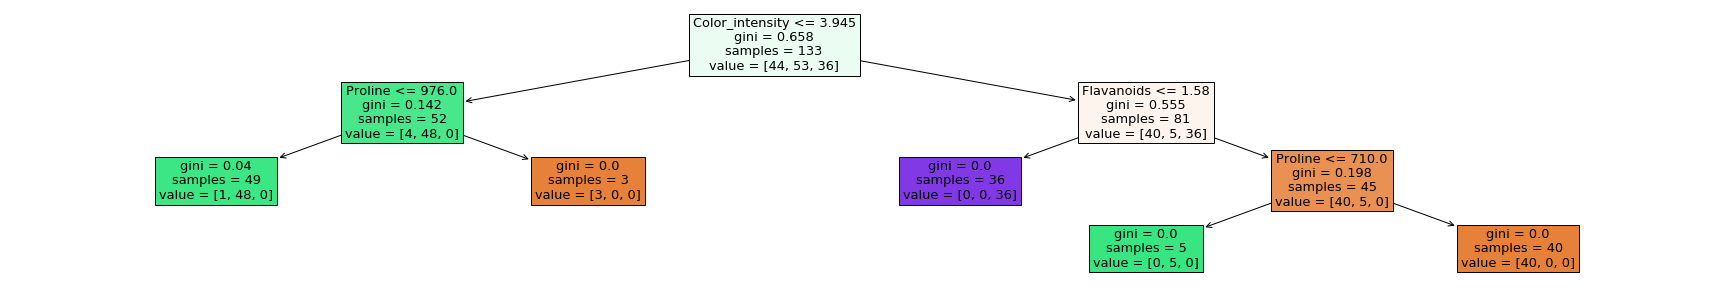

In [43]:
plt.figure(figsize=(30, 5))
plot_tree(tree, feature_names=X_train.columns, filled=True)